## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time
import datatable as dt

%matplotlib inline

### Speed up techniques from Bex T.

https://towardsdatascience.com/6-pandas-mistakes-that-silently-tell-you-are-a-rookie-b566a252e60d


In [2]:
%%time
# pd.read_csv Wall time: 75.1 ms vs. dt.fread Wall time: 52.8 ms

df= dt.fread('Zomatodataset.zip/zomato.csv', encoding='latin-1').to_pandas()
df.head()

Wall time: 103 ms


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int32  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int32  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int32  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Function (written by Bex T.) that casts floats and integers to their smallest subtype

In [5]:
# def reduce_memory_usage(df, verbose=True):
#     numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
#     start_mem = df.memory_usage().sum() / 1024 ** 2
#     for col in df.columns:
#         col_type = df[col].dtypes
#         if col_type in numerics:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == "int":
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)
#             else:
#                 if (
#                     c_min > np.finfo(np.float16).min
#                     and c_max < np.finfo(np.float16).max
#                 ):
#                     df[col] = df[col].astype(np.float16)
#                 elif (
#                     c_min > np.finfo(np.float32).min
#                     and c_max < np.finfo(np.float32).max
#                 ):
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#     end_mem = df.memory_usage().sum() / 1024 ** 2
#     if verbose:
#         print(
#             "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
#                 end_mem, 100 * (start_mem - end_mem) / start_mem
#             )
#         )
#     return df

### Try to reduce memory usage

In [6]:
# reduce_memory_usage(df)
# df.info()

'reduce_memory_usage(df)\ndf.info()'

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Check missing values

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<AxesSubplot:>

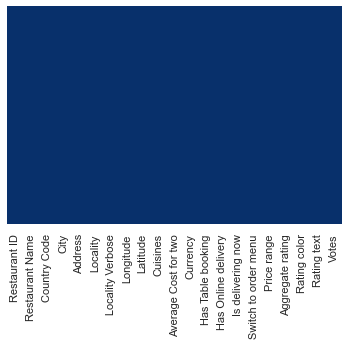

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues_r')

In [11]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
final_df = pd.merge(df, df_country, on='Country Code', how='left')

In [13]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [14]:
final_df.dtypes

Restaurant ID             int32
Restaurant Name          object
Country Code              int32
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int32
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int32
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int32
Country                  object
dtype: object

In [15]:
country_names = final_df.Country.value_counts().index

In [16]:
country_val = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x11e2fdafb20>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, "'94.39%'"),
  Text(0.5876082086391032, -0.12131196618612707, "'4.73%'"),
  Text(0.5997744629358018, -0.01644972978715676, "'0.87%'")])

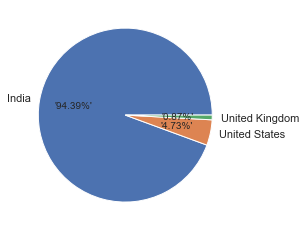

In [17]:
## Pie chart
plt.pie(country_val[:3], labels=country_names[:3], autopct="'%1.2f%%'")

Observations: Zomato's majority of transactions are from India 94.39%. 
Then, from US 4.73% and UK 0.87%.

In [18]:
final_df.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'], dtype=object)

In [19]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [20]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observations: 
1. rating from 4.5 to 4.9 labeled as Excellent
2. rating from 4.0 to 4.4 labeled as Very Good
3. rating from 3.5 to 3.9 labeled as Good
4. rating from 2.5 to 3.4 labeled as Average
5. rating from 1.8 to 2.4 labeled as Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

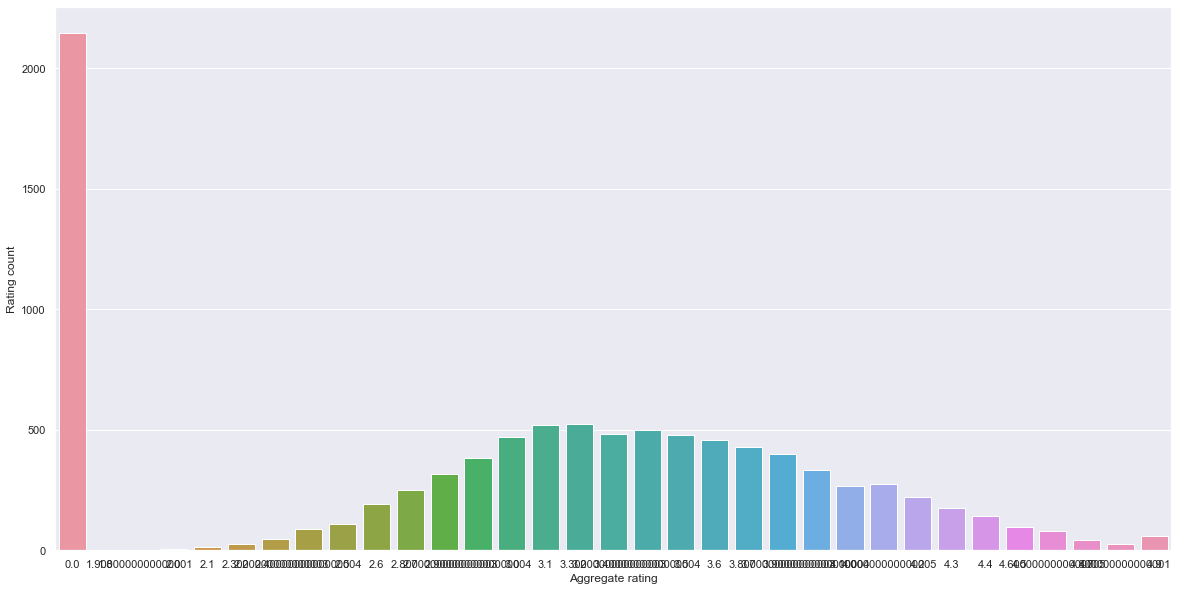

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Aggregate rating', y='Rating count', data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

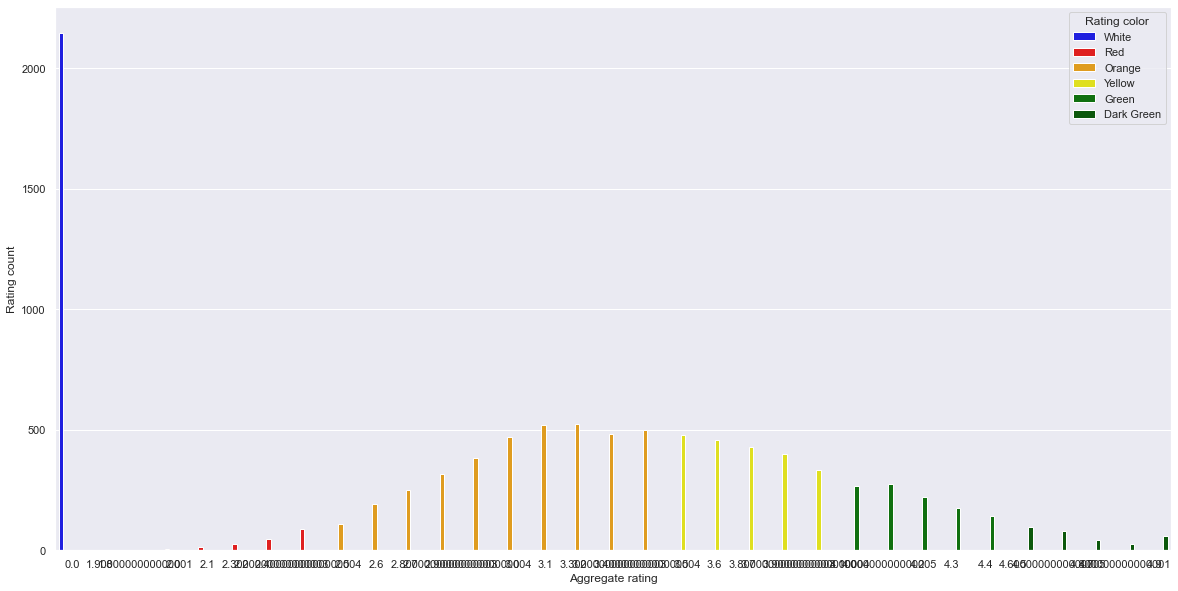

In [22]:
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', data=ratings,
            palette=['blue', 'red','orange', 'yellow', 'green', 'darkgreen']
           )

Observations:
1. Bar for not rated restaurants is very high
2. Maximun namber of rating between 2.5 and 3.4 

<AxesSubplot:xlabel='Rating color', ylabel='count'>

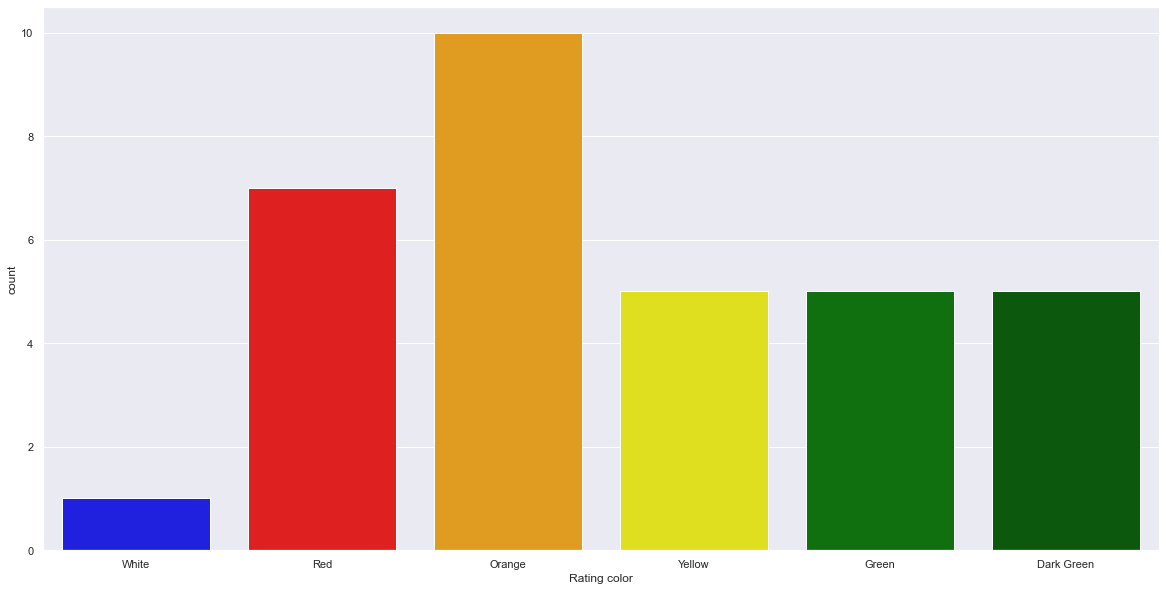

In [23]:
# Count plot 
sns.countplot(x='Rating color', data=ratings, palette=['blue', 'red','orange', 'yellow', 'green', 'darkgreen'])

### Find countries that have 0 rating

In [24]:
zero_rating_countries = final_df.groupby(['Aggregate rating', 'Country']).size().reset_index()
zero_rating_countries.head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations: Maximum number of 0 rating is in Indian customers

### Find out which currency is used by each country

In [25]:
country_currency = final_df[['Country', 'Currency']].groupby(['Currency', 'Country']).size().reset_index()

In [26]:
country_currency

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


### Which countries have online delivery option

In [27]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [28]:
delivery_opt = final_df[df['Has Online delivery']=='Yes'].groupby(['Country']).size().reset_index()
delivery_opt

,Country,0
0,India,2423
1,UAE,28


In [29]:
delivery_opt = final_df[['Has Online delivery', 'Country']].groupby(['Has Online delivery', 'Country']).size().reset_index()
delivery_opt

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observations:
1. Online deliveries are avalible only in India and UAE

### Create a pie chart for cities distribution

([<matplotlib.patches.Wedge at 0x11e3065b730>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, "'68.87%'"),
  Text(0.0340186500653484, -0.5990348332507311, "'14.07%'"),
  Text(0.47940246685229276, -0.36079533641101336, "'13.59%'"),
  Text(0.5957573682667329, -0.07122610585941394, "'3.16%'"),
  Text(0.5999706981848791, -0.005929698099289049, "'0.31%'")])

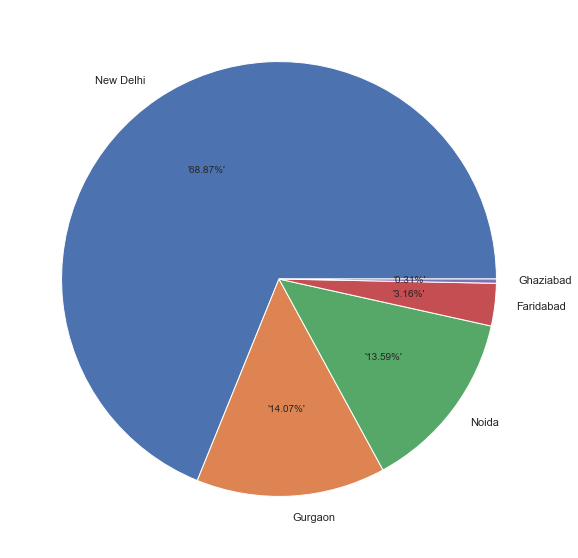

In [30]:
city_names = final_df.City.value_counts().index
city_val = final_df.City.value_counts().values
plt.pie(city_val[:5], labels=city_names[:5], autopct="'%1.2f%%'")

### Find the top 10 cuisines

In [31]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
top_cuisines = final_df.groupby(['Cuisines']).size().reset_index().rename(columns={0:'Frequency'})

In [33]:
top_cuisines.sort_values(by='Frequency', ascending=False)[:10]

,Cuisines,Frequency
1307,North Indian,936
1330,"North Indian, Chinese",511
498,Chinese,354
829,Fast Food,354
1515,"North Indian, Mughlai",334
332,Cafe,299
178,Bakery,218
1521,"North Indian, Mughlai, Chinese",197
187,"Bakery, Desserts",170
1750,Street Food,149


Observations:
1. The most frequent cuisine is North Indian
2. Second most common cuisine is Chinese